In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_beef = pd.read_excel("C:/Users/Winquistt/DSC 680/Week 5 thru 8/history.xls", sheet_name='beef')

In [5]:
df_beef.head(10)

,Date,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail,All fresh beef retail value
0,1970-01-01,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,1970-02-01,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,1970-03-01,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,1970-04-01,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,1970-05-01,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN
5,1970-06-01,6.0,72.5,66.5,78.2,99.8,33.3,11.7,21.6,NaN
6,1970-07-01,5.9,74.1,68.2,81.5,102.0,33.8,13.3,20.5,NaN
7,1970-08-01,6.0,71.7,65.7,79.1,101.7,36.0,13.4,22.6,NaN
8,1970-09-01,6.0,70.4,64.4,76.8,100.2,35.8,12.4,23.4,NaN
9,1970-10-01,6.1,69.1,63.0,74.6,99.3,36.3,11.6,24.7,NaN


In [7]:
# Convert relevant columns to numeric (if not already)
df_beef['Gross farm value'] = pd.to_numeric(df_beef['Gross farm value'], errors='coerce')
df_beef['Net farm value'] = pd.to_numeric(df_beef['Net farm value'], errors='coerce')
df_beef['Wholesale value'] = pd.to_numeric(df_beef['Wholesale value'], errors='coerce')
df_beef['Retail value'] = pd.to_numeric(df_beef['Retail value'], errors='coerce')
df_beef['Total'] = pd.to_numeric(df_beef['Total'], errors='coerce')
df_beef['Farm-wholesale'] = pd.to_numeric(df_beef['Farm-wholesale'], errors='coerce')
df_beef['Wholesale-retail'] = pd.to_numeric(df_beef['Wholesale-retail'], errors='coerce')

# Ensure the Date column is in datetime format
df_beef['Date'] = pd.to_datetime(df_beef['Date'], errors='coerce')

df_beef.head()

,Date,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail,All fresh beef retail value
0,1970-01-01,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,1970-02-01,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,1970-03-01,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,1970-04-01,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,1970-05-01,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN


In [9]:
# Print the column names to inspect them
print(df_beef.columns)


Index(['Date', 'Byproduct', 'Gross farm value', 'Net farm value',
       'Wholesale value', 'Retail value', 'Total', 'Farm-wholesale',
       'Wholesale-retail', 'All fresh beef retail value'],
      dtype='object')


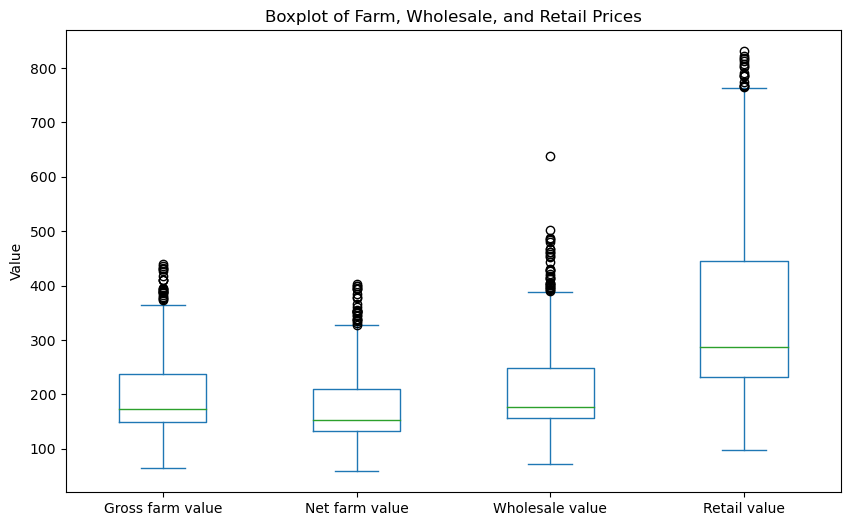

In [13]:
import matplotlib.pyplot as plt

# List the correct column names based on the printed ones
df_beef[['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']].plot(kind='box', figsize=(10,6))

# Add title and labels
plt.title('Boxplot of Farm, Wholesale, and Retail Prices')
plt.ylabel('Value')
plt.show()

<Axes: xlabel='Date'>

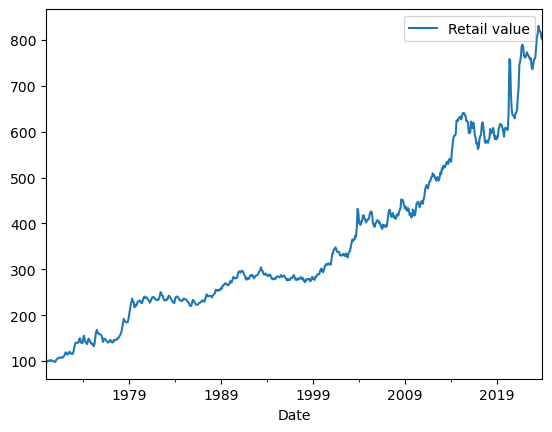

In [15]:
df_beef.plot(x = 'Date', y = 'Retail value')

<Axes: xlabel='Date'>

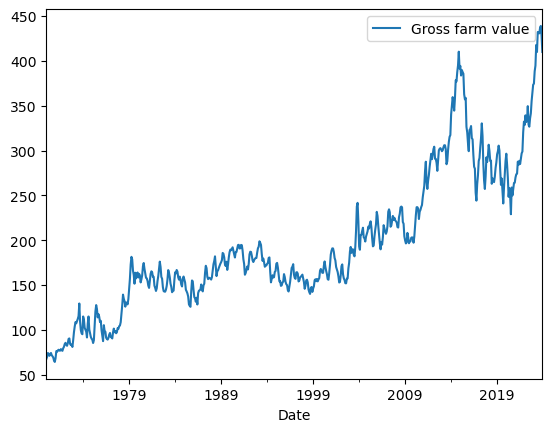

In [17]:
df_beef.plot(x = 'Date', y = 'Gross farm value')

In [19]:
df_2015 = df_beef[df_beef['Date'].dt.year == 2015]


C:\Users\Winquistt\AppData\Local\Temp\ipykernel_26144\1338376038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_beef.groupby(df_beef['Date'].dt.year).mean()[['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']].plot(kind='line', figsize=(10, 6))


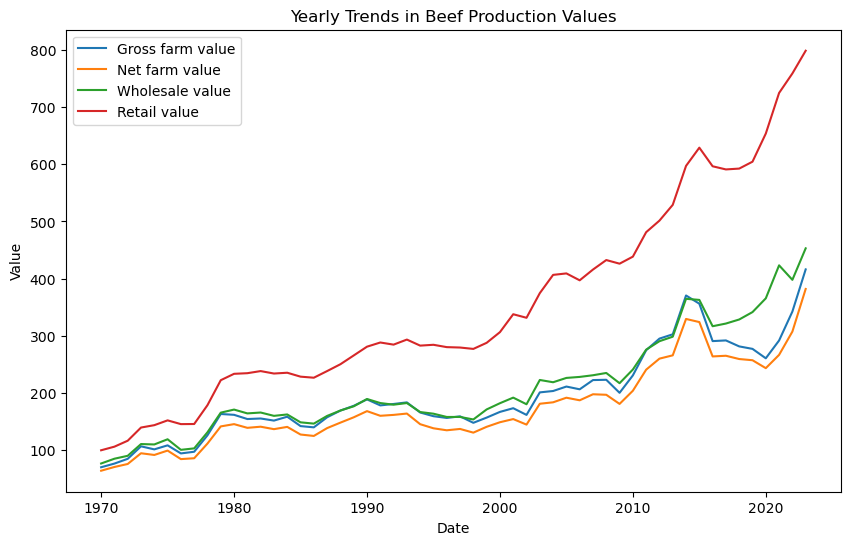

In [21]:
df_beef.groupby(df_beef['Date'].dt.year).mean()[['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']].plot(kind='line', figsize=(10, 6))
plt.title('Yearly Trends in Beef Production Values')
plt.ylabel('Value')
plt.show()


In [23]:
# If the date column is not in datetime format, convert it
df_beef['Date'] = pd.to_datetime(df_beef['Date'])

In [25]:
# Filter the dataset for 2015
df_2014 = df_beef[df_beef['Date'].dt.year == 2014]

In [27]:
# Group by month and calculate the mean for each month
df_2014_monthly = df_2014.groupby(df_2014['Date'].dt.month)['Retail value'].mean()

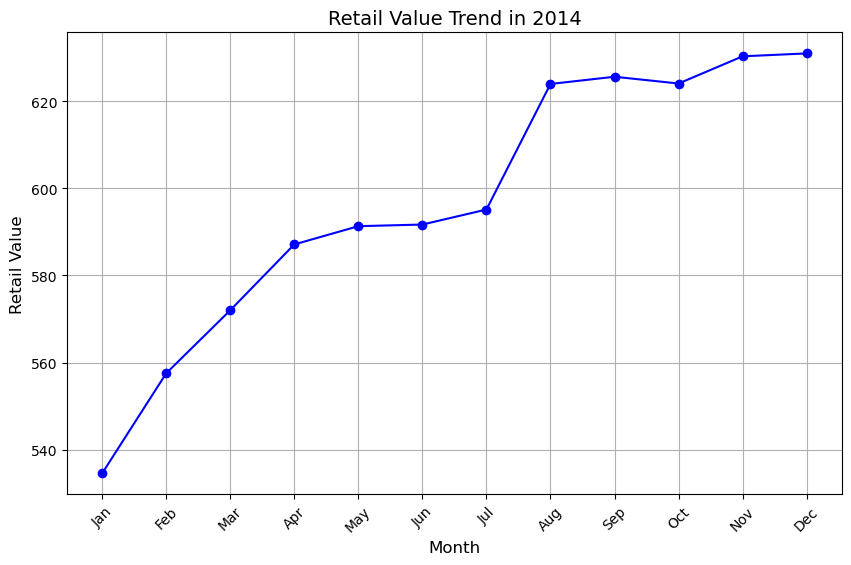

In [29]:
import matplotlib.pyplot as plt

# Plot the trend for Retail value in 2015
plt.figure(figsize=(10, 6))
df_2014_monthly.plot(kind='line', marker='o', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2014', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

In [175]:
# Filter the dataset for 2015
df_2015 = df_beef[df_beef['Date'].dt.year == 2015]

In [177]:
# Group by month and calculate the mean for each month
df_2015_monthly = df_2015.groupby(df_2015['Date'].dt.month)['Retail value'].mean()

In [63]:
# Filter data for the year 2015 and calculate the mean values
data_2015 = df_beef[df_beef['Date'].dt.year == 2015].mean()[
    ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
]

# Calculate the overall average values
overall_mean = df_beef.mean()[
    ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
]

# Calculate percentage change for 2015 relative to overall averages
percent_change_2015 = ((data_2015 - overall_mean) / overall_mean) * 100

# Display the results
print("Average values in 2015:")
print(data_2015)
print("\nPercentage change in 2015 relative to overall averages:")
print(percent_change_2015)


Average values in 2015:
Gross farm value    356.162000
Net farm value      324.034994
Wholesale value     362.778752
Retail value        628.885862
dtype: float64

Percentage change in 2015 relative to overall averages:
Gross farm value    55.555500
Net farm value      57.810284
Wholesale value     46.361219
Retail value        45.204943
dtype: float64


C:\Users\Winquistt\AppData\Local\Temp\ipykernel_26144\3626085043.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_2015 = df_beef[df_beef['Date'].dt.year == 2015].mean()[
C:\Users\Winquistt\AppData\Local\Temp\ipykernel_26144\3626085043.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  overall_mean = df_beef.mean()[


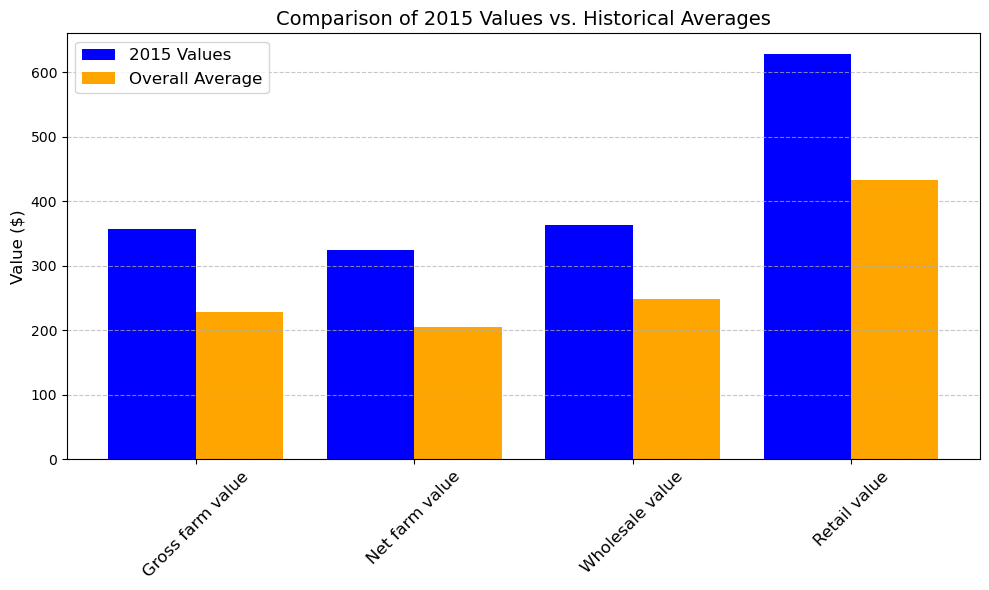

In [65]:


# Data preparation
categories = ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
values_2015 = data_2015.values
values_average = overall_mean.values
x = np.arange(len(categories))

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, values_2015, width=0.4, label='2015 Values', color='blue')
plt.bar(x + 0.2, values_average, width=0.4, label='Overall Average', color='orange')

# Customizing the plot
plt.title('Comparison of 2015 Values vs. Historical Averages', fontsize=14)
plt.xticks(x, categories, rotation=45, fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the graph
plt.show()


In [181]:
# Filter the dataset for 2015
df_2016 = df_beef[df_beef['Date'].dt.year == 2016]

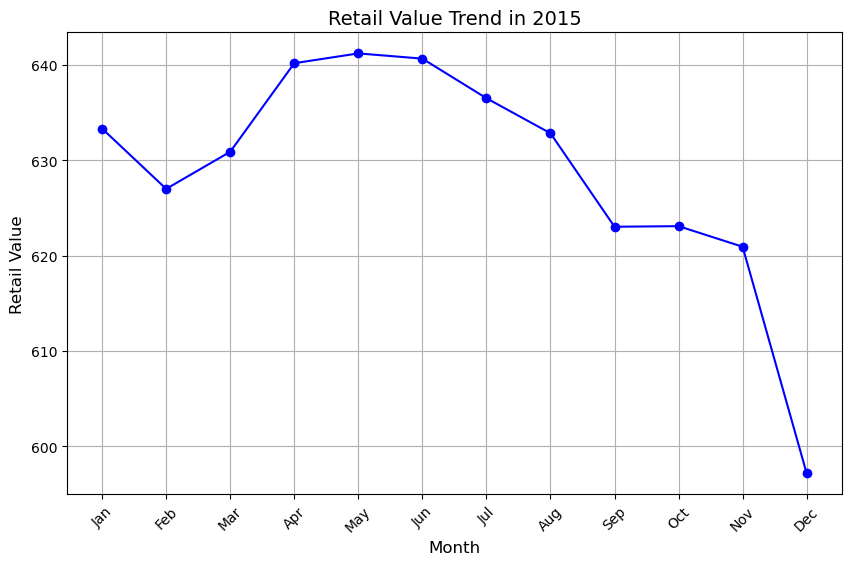

In [179]:
import matplotlib.pyplot as plt

# Plot the trend for Retail value in 2015
plt.figure(figsize=(10, 6))
df_2015_monthly.plot(kind='line', marker='o', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2015', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

In [183]:
# Group by month and calculate the mean for each month
df_2016_monthly = df_2016.groupby(df_2016['Date'].dt.month)['Retail value'].mean()

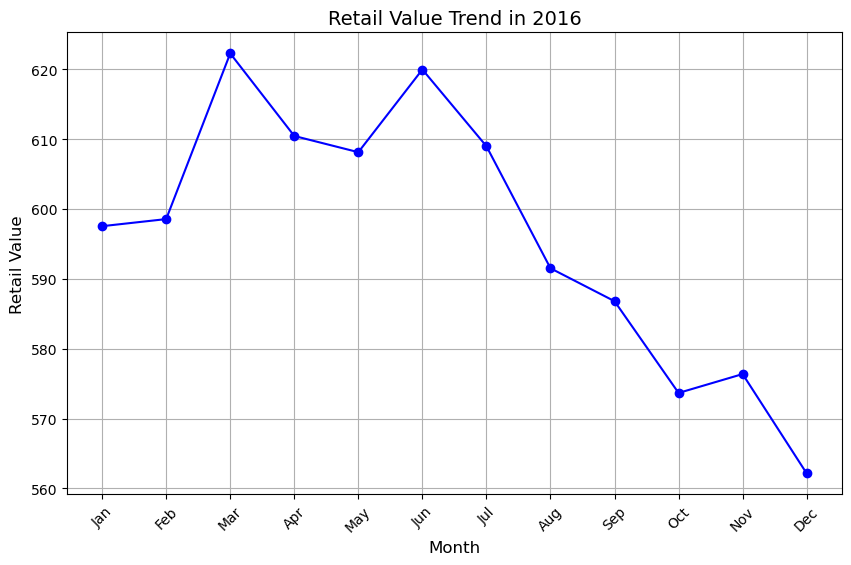

In [185]:
# Plot the trend for Retail value in 2015
plt.figure(figsize=(10, 6))
df_2016_monthly.plot(kind='line', marker='o', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2016', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

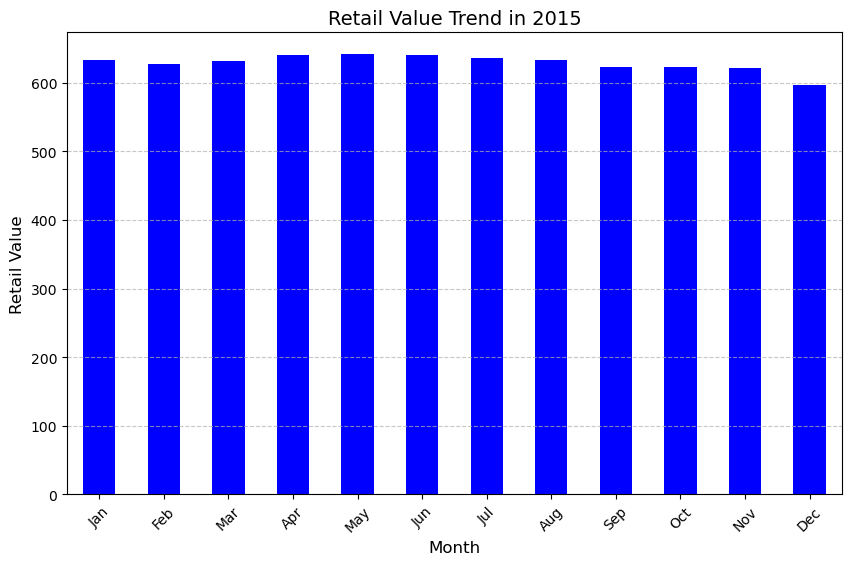

In [299]:
# Ensure the 'Date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_beef['Date']):
    df_beef['Date'] = pd.to_datetime(df_beef['Date'])

# Filter for 2016 data
df_2015 = df_beef[df_beef['Date'].dt.year == 2015]

# Group by month and calculate the mean Retail value for each month in 2016
df_2015_monthly = df_2015.groupby(df_2015['Date'].dt.month)['Retail value'].mean()

# Plot the trend for Retail value in 2016 as a bar graph
plt.figure(figsize=(10, 6))
df_2015_monthly.plot(kind='bar', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2015', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

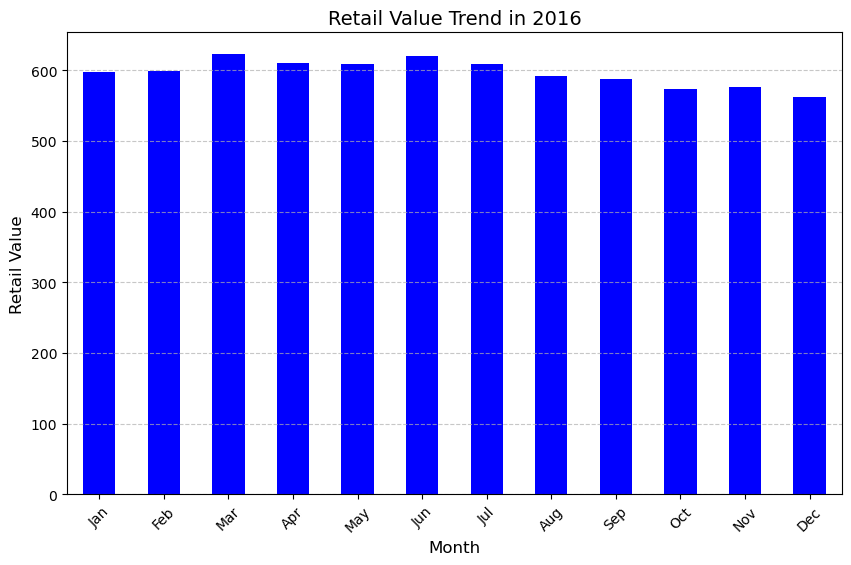

In [297]:
# Ensure the 'Date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_beef['Date']):
    df_beef['Date'] = pd.to_datetime(df_beef['Date'])

# Filter for 2016 data
df_2016 = df_beef[df_beef['Date'].dt.year == 2016]

# Group by month and calculate the mean Retail value for each month in 2016
df_2016_monthly = df_2016.groupby(df_2016['Date'].dt.month)['Retail value'].mean()

# Plot the trend for Retail value in 2016 as a bar graph
plt.figure(figsize=(10, 6))
df_2016_monthly.plot(kind='bar', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2016', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


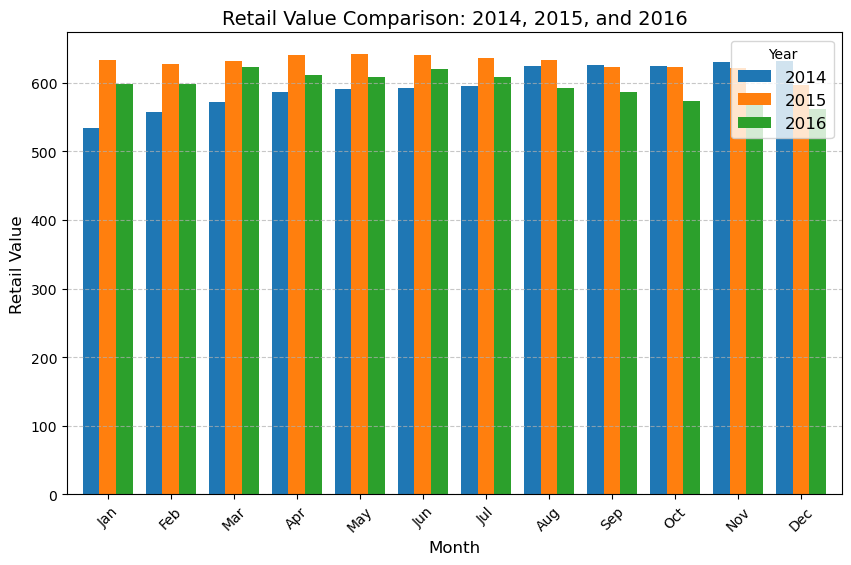

In [37]:
# Filter for 2014, 2015, and 2016 data
df_2014 = df_beef[df_beef['Date'].dt.year == 2014]
df_2015 = df_beef[df_beef['Date'].dt.year == 2015]
df_2016 = df_beef[df_beef['Date'].dt.year == 2016]

# Group by month and calculate the mean Retail value for each month in each year
df_2014_monthly = df_2014.groupby(df_2014['Date'].dt.month)['Retail value'].mean()
df_2015_monthly = df_2015.groupby(df_2015['Date'].dt.month)['Retail value'].mean()
df_2016_monthly = df_2016.groupby(df_2016['Date'].dt.month)['Retail value'].mean()

# Combine the three years into a single DataFrame
df_comparison = pd.DataFrame({'2014': df_2014_monthly, '2015': df_2015_monthly, '2016': df_2016_monthly})

# Plot side-by-side bar chart
df_comparison.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Retail Value Comparison: 2014, 2015, and 2016', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', fontsize=12)
plt.show()



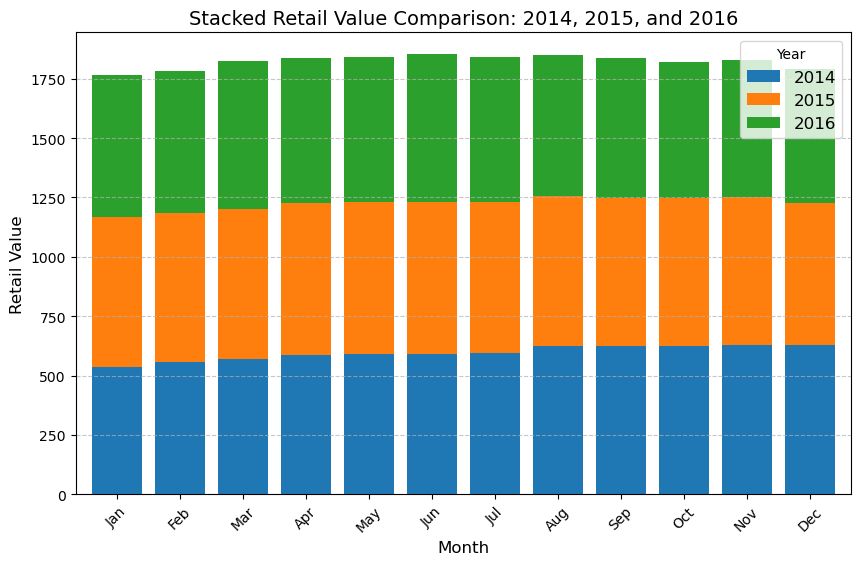

In [39]:
# Combine the three years into a single DataFrame for a stacked bar plot
df_combined = pd.DataFrame({'2014': df_2014_monthly, '2015': df_2015_monthly, '2016': df_2016_monthly})

# Plot stacked bar chart
df_combined.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Stacked Retail Value Comparison: 2014, 2015, and 2016', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', fontsize=12)
plt.show()


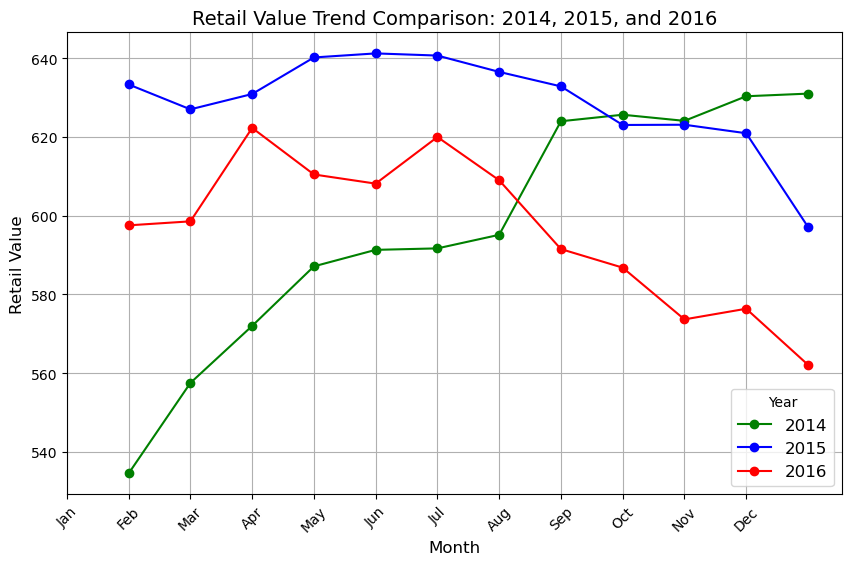

In [41]:
# Plot the trend for 2014, 2015, and 2016 as line plots
plt.figure(figsize=(10, 6))

# Plot 2014, 2015, and 2016 on the same line chart
plt.plot(df_2014_monthly.index, df_2014_monthly.values, marker='o', label='2014', color='g')
plt.plot(df_2015_monthly.index, df_2015_monthly.values, marker='o', label='2015', color='b')
plt.plot(df_2016_monthly.index, df_2016_monthly.values, marker='o', label='2016', color='r')

# Customize the plot
plt.title('Retail Value Trend Comparison: 2014, 2015, and 2016', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.legend(title='Year', fontsize=12)
plt.show()


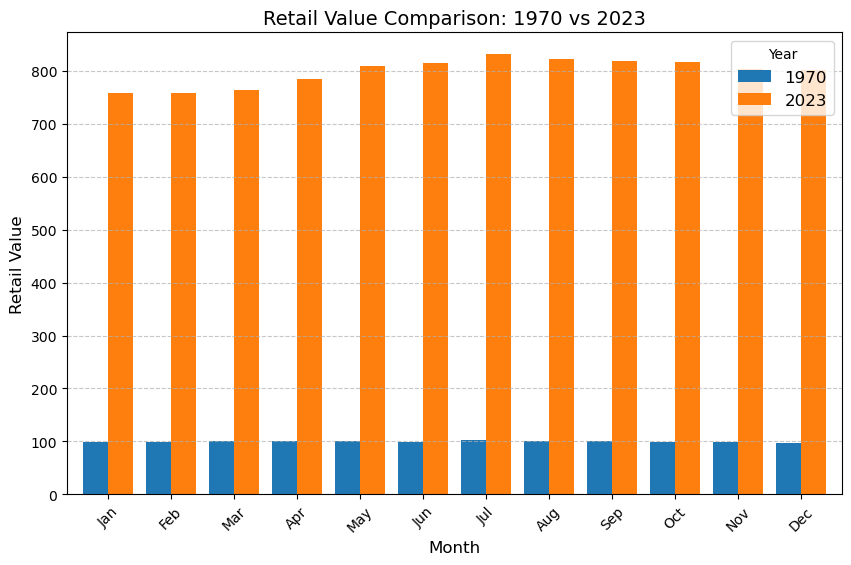

In [43]:
# Filter for 1970 and 2023 data
df_1970 = df_beef[df_beef['Date'].dt.year == 1970]
df_2023 = df_beef[df_beef['Date'].dt.year == 2023]

# Group by month and calculate the mean Retail value for each month in each year
df_1970_monthly = df_1970.groupby(df_1970['Date'].dt.month)['Retail value'].mean()
df_2023_monthly = df_2023.groupby(df_2023['Date'].dt.month)['Retail value'].mean()

# Combine the two years into a single DataFrame
df_comparison = pd.DataFrame({'1970': df_1970_monthly, '2023': df_2023_monthly})

# Plot side-by-side bar chart
df_comparison.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Retail Value Comparison: 1970 vs 2023', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', fontsize=12)
plt.show()



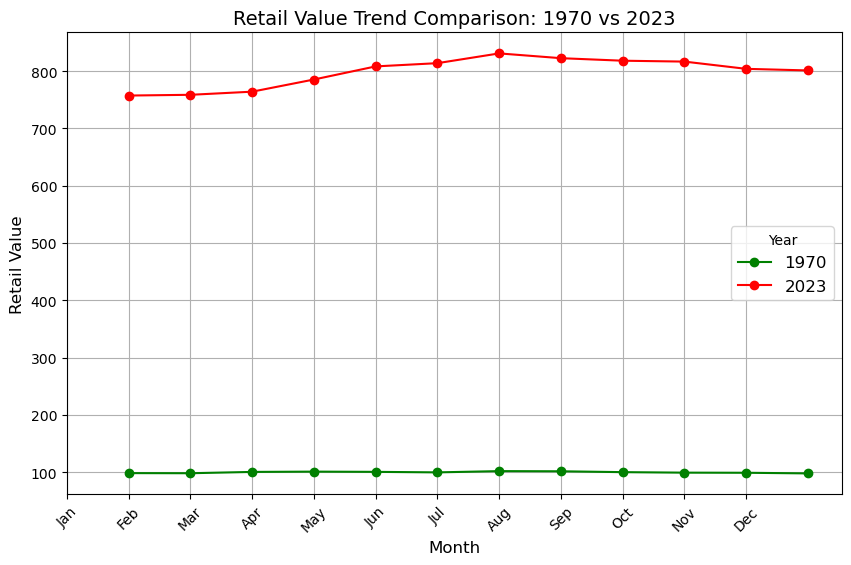

In [45]:
# Plot the trend for 1970 and 2023 as line plots
plt.figure(figsize=(10, 6))

# Plot 1970 and 2023 on the same line chart
plt.plot(df_1970_monthly.index, df_1970_monthly.values, marker='o', label='1970', color='g')
plt.plot(df_2023_monthly.index, df_2023_monthly.values, marker='o', label='2023', color='r')

# Customize the plot
plt.title('Retail Value Trend Comparison: 1970 vs 2023', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.legend(title='Year', fontsize=12)
plt.show()


In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Scale production to millions (divide by 1e6)
df_production['Production'] = df_production['Production'] / 1e6  # Scaled to millions of pounds

# Plot the data
plt.plot(df_production['Year'], df_production['Production'], marker='o', linestyle='-', color='b')

# Title and labels
plt.title('Beef Slaughter Production Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Beef Slaughter Production (Millions of LB)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for easier readability of the chart
plt.grid(True)

# Format y-axis with commas for better readability
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: f"{x:,.0f}"))

# Show the plot
plt.show()


NameError: name 'df_production' is not defined

<Figure size 1000x600 with 0 Axes>

Mean Absolute Error: 14.844861091708351
Mean Squared Error: 450.85131948209215
Root Mean Squared Error: 21.23325974696519


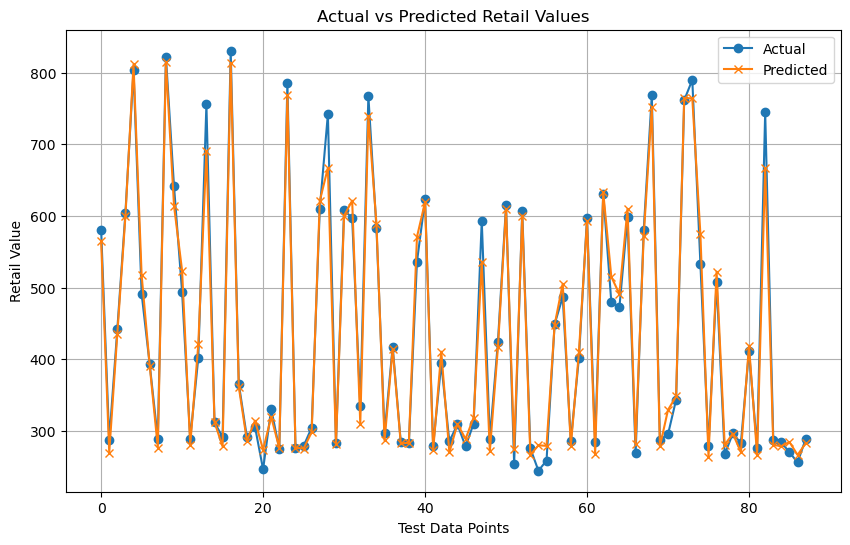

C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Forecasted Values:
438    802.538638
439    803.528548
440    804.075770
441    804.349143
442    804.478348
443    804.537353
444    804.563691
445    804.575261
446    804.580285
447    804.582448
448    804.583373
449    804.583767
Name: predicted_mean, dtype: float64


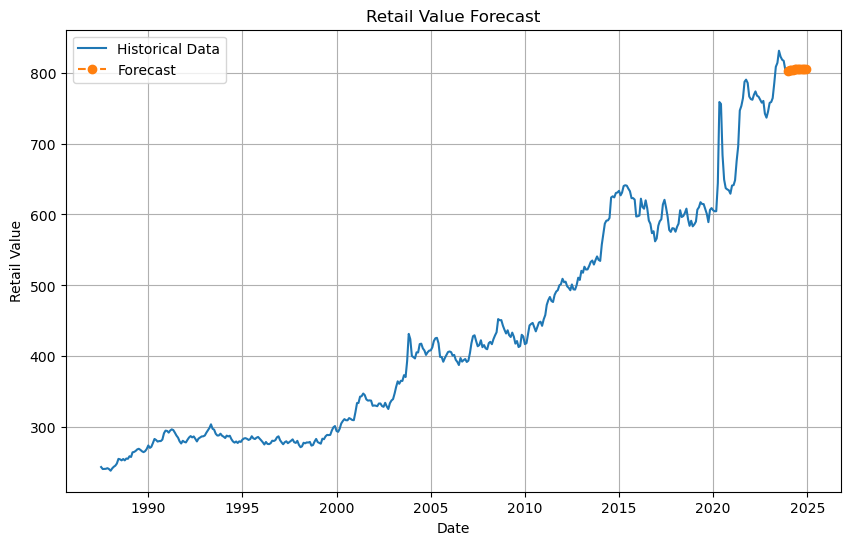

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Convert Date to datetime format and sort
df_beef['Date'] = pd.to_datetime(df_beef['Date'])
df_beef = df_beef.sort_values('Date')

# Select features and target variable
features = ['Gross farm value', 'Net farm value', 'Wholesale value']  # Independent variables
target = 'Retail value'  # Dependent variable

# Create lagged features for time-series modeling
for lag in range(1, 4):  # Lag 1 to 3 months
    for feature in features:
        df_beef[f'{feature}_lag_{lag}'] = df_beef[feature].shift(lag)

# Drop rows with NaN values created by lagging
df_beef = df_beef.dropna()

# Train-test split
X = df_beef[['Gross farm value', 'Net farm value', 'Wholesale value'] + [f'{feature}_lag_{lag}' for feature in features for lag in range(1, 4)]]
y = df_beef[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Retail Values")
plt.xlabel("Test Data Points")
plt.ylabel("Retail Value")
plt.legend()
plt.grid(True)
plt.show()

# ARIMA for time-series forecasting
arima_model = ARIMA(df_beef[target], order=(2, 1, 2))  # Adjust order based on ACF and PACF plots
arima_result = arima_model.fit()

# Forecast future values
forecast = arima_result.forecast(steps=12)  # Forecast for the next 12 months
print("\nForecasted Values:")
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df_beef['Date'], df_beef[target], label="Historical Data")
future_dates = pd.date_range(df_beef['Date'].iloc[-1], periods=12, freq='M')
plt.plot(future_dates, forecast, label="Forecast", marker='o', linestyle='--')
plt.title("Retail Value Forecast")
plt.xlabel("Date")
plt.ylabel("Retail Value")
plt.legend()
plt.grid(True)
plt.show()
